# 6.4 - Supervised Machine Learning - Regression

## Contents:
### 01. Import libraries and data
### 02. Data cleaning
### 03. Data prep for regression analysis
### 04. Regression analysis

## 01. Import libraries and data

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Ensure graphs are displayed within the notebook without the need to "call" them specifically

%matplotlib inline

In [5]:
path = r'C:\Users\lrutl\OneDrive\Desktop\Advanced Analytics & Dashboard Design\COVID19 School ReOpening and Students'

In [6]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data','Prepared data','sf_rc_merged.csv'))

## 02. Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               5126 non-null   int64  
 1   Week                                     5126 non-null   object 
 2   DistrictName                             5126 non-null   object 
 3   Model_Elementary                         5116 non-null   object 
 4   Model_Middle                             5101 non-null   object 
 5   Model_High                               5073 non-null   object 
 6   GradeLevels_Remote_Phasein               898 non-null    object 
 7   StudentGroups_Remote_Phasein             998 non-null    object 
 8   Other_Remote_Phasein                     248 non-null    object 
 9   Enrollment_Elementary                    5126 non-null   int64  
 10  FullTimeALE_Elementary                   5126 no

In [8]:
df.head(20)

,Unnamed: 0,Week,DistrictName,Model_Elementary,Model_Middle,Model_High,GradeLevels_Remote_Phasein,StudentGroups_Remote_Phasein,Other_Remote_Phasein,Enrollment_Elementary,...,Non-Low Income,Non Migrant,Non Military Parent,Non Mobile,Non Section 504,Students without Disabilities,Percent Low-income,Percent Non-Low Income,Percent Homeless,Percent Non-Homeless
0,0,1/18/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
1,1,1/25/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
2,2,2/1/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
3,3,2/22/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
4,4,3/1/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
5,5,3/8/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
6,6,3/15/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
7,7,4/12/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
8,8,4/19/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99
9,9,4/26/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,...,418,591,583,572,583,527,0.29,0.71,0.01,0.99


In [9]:
# Change Percent Low-income to int64 data type

df['Percent Low-income'] = df['Percent Low-income'].astype('float64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               5126 non-null   int64  
 1   Week                                     5126 non-null   object 
 2   DistrictName                             5126 non-null   object 
 3   Model_Elementary                         5116 non-null   object 
 4   Model_Middle                             5101 non-null   object 
 5   Model_High                               5073 non-null   object 
 6   GradeLevels_Remote_Phasein               898 non-null    object 
 7   StudentGroups_Remote_Phasein             998 non-null    object 
 8   Other_Remote_Phasein                     248 non-null    object 
 9   Enrollment_Elementary                    5126 non-null   int64  
 10  FullTimeALE_Elementary                   5126 no

In [11]:
# Change Percent Non-Low Income to int64 data type

df['Percent Non-Low Income'] = df['Percent Non-Low Income'].astype('float64')

In [12]:
# Change Percent Homeless to int64 data type

df['Percent Homeless'] = df['Percent Homeless'].astype('float64')

In [13]:
# Change Percent Non-Homeless to int64 data type

df['Percent Non-Homeless'] = df['Percent Non-Homeless'].astype('float64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               5126 non-null   int64  
 1   Week                                     5126 non-null   object 
 2   DistrictName                             5126 non-null   object 
 3   Model_Elementary                         5116 non-null   object 
 4   Model_Middle                             5101 non-null   object 
 5   Model_High                               5073 non-null   object 
 6   GradeLevels_Remote_Phasein               898 non-null    object 
 7   StudentGroups_Remote_Phasein             998 non-null    object 
 8   Other_Remote_Phasein                     248 non-null    object 
 9   Enrollment_Elementary                    5126 non-null   int64  
 10  FullTimeALE_Elementary                   5126 no

In [15]:
# Drop Unnamed: 0 column not needed for analysis

df = df.drop(columns = ['Unnamed: 0'])

In [16]:
# Check for duplicates

dups = df.duplicated()

In [17]:
dups.shape

(5126,)

In [18]:
# Check Percent Low-income mean

df['Percent Low-income'].mean()

0.5021088568084308

In [19]:
# Check Percent Low-income median

df['Percent Low-income'].median()

0.5

In [20]:
# Check Percent Low-income max

df['Percent Low-income'].max()

1.0

In [21]:
# Export data

df.to_csv(os.path.join(path,'02 Data','Prepared data','sf_rc_merged_v2.csv'))

## 03. Data prep for regression analysis

In [75]:
# 1. Split data into groups based on "user_id" column.
# 2. Apply the transform() function on the “order_number” column to generate the maximum orders for each user.
# 3. Create a new column, “max_order,” into which you’ll place the results of your aggregation.

df['Max Sum of Enrollment'] = df.groupby(['DistrictName'])['Sum of Enrollment'].transform(np.max)

In [76]:
df.head(20)

,Week,DistrictName,Model_Elementary,Model_Middle,Model_High,GradeLevels_Remote_Phasein,StudentGroups_Remote_Phasein,Other_Remote_Phasein,Enrollment_Elementary,FullTimeALE_Elementary,...,Non Migrant,Non Military Parent,Non Mobile,Non Section 504,Students without Disabilities,Percent Low-income,Percent Non-Low Income,Percent Homeless,Percent Non-Homeless,Max Sum of Enrollment
0,1/18/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,591,583,572,583,527,0.29,0.71,0.01,0.99,599
1,1/25/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,591,583,572,583,527,0.29,0.71,0.01,0.99,599
2,2/1/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,591,583,572,583,527,0.29,0.71,0.01,0.99,599
3,2/22/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,591,583,572,583,527,0.29,0.71,0.01,0.99,599
4,3/1/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,591,583,572,583,527,0.29,0.71,0.01,0.99,599
5,3/8/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,591,583,572,583,527,0.29,0.71,0.01,0.99,599
6,3/15/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,591,583,572,583,527,0.29,0.71,0.01,0.99,599
7,4/12/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,0,...,591,583,572,583,527,0.29,0.71,0.01,0.99,599
8,4/19/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,0,...,591,583,572,583,527,0.29,0.71,0.01,0.99,599
9,4/26/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,0,...,591,583,572,583,527,0.29,0.71,0.01,0.99,599


In [77]:
df['Max Sum of OptOut'] = df.groupby(['DistrictName'])['Sum of OptOut'].transform(np.max)

In [78]:
df.head(20)

,Week,DistrictName,Model_Elementary,Model_Middle,Model_High,GradeLevels_Remote_Phasein,StudentGroups_Remote_Phasein,Other_Remote_Phasein,Enrollment_Elementary,FullTimeALE_Elementary,...,Non Military Parent,Non Mobile,Non Section 504,Students without Disabilities,Percent Low-income,Percent Non-Low Income,Percent Homeless,Percent Non-Homeless,Max Sum of Enrollment,Max Sum of OptOut
0,1/18/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,583,572,583,527,0.29,0.71,0.01,0.99,599,42
1,1/25/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,583,572,583,527,0.29,0.71,0.01,0.99,599,42
2,2/1/2021,Adna School District,Typical/Traditional In-Person,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,583,572,583,527,0.29,0.71,0.01,0.99,599,42
3,2/22/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,583,572,583,527,0.29,0.71,0.01,0.99,599,42
4,3/1/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,583,572,583,527,0.29,0.71,0.01,0.99,599,42
5,3/8/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,583,572,583,527,0.29,0.71,0.01,0.99,599,42
6,3/15/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,216,0,...,583,572,583,527,0.29,0.71,0.01,0.99,599,42
7,4/12/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,0,...,583,572,583,527,0.29,0.71,0.01,0.99,599,42
8,4/19/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,0,...,583,572,583,527,0.29,0.71,0.01,0.99,599,42
9,4/26/2021,Adna School District,Partial In-Person for All Students,Partial In-Person for All Students,Partial In-Person for All Students,NaN,NaN,NaN,226,0,...,583,572,583,527,0.29,0.71,0.01,0.99,599,42


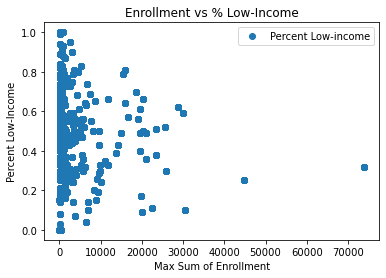

In [79]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Max Sum of Enrollment', y='Percent Low-income',style='o') 
plt.title('Enrollment vs % Low-Income')  
plt.xlabel('Max Sum of Enrollment')  
plt.ylabel('Percent Low-Income')
plt.show()

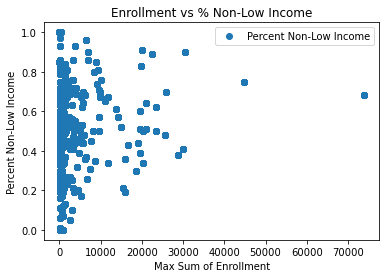

In [80]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Max Sum of Enrollment', y='Percent Non-Low Income',style='o') 
plt.title('Enrollment vs % Non-Low Income')  
plt.xlabel('Max Sum of Enrollment')  
plt.ylabel('Percent Non-Low Income')  
plt.show()

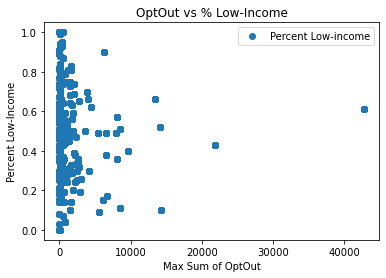

In [81]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Max Sum of OptOut', y='Percent Low-income',style='o') 
plt.title('OptOut vs % Low-Income')  
plt.xlabel('Max Sum of OptOut')  
plt.ylabel('Percent Low-Income')
plt.show()

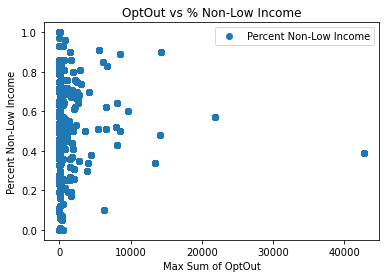

In [82]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Max Sum of OptOut', y='Percent Non-Low Income',style='o') 
plt.title('OptOut vs % Non-Low Income')  
plt.xlabel('Max Sum of OptOut')  
plt.ylabel('Percent Non-Low Income')  
plt.show()

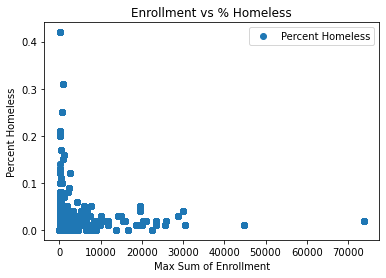

In [83]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Max Sum of Enrollment', y='Percent Homeless',style='o') 
plt.title('Enrollment vs % Homeless')  
plt.xlabel('Max Sum of Enrollment')  
plt.ylabel('Percent Homeless')
plt.show()

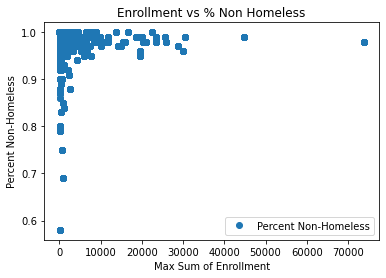

In [85]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Max Sum of Enrollment', y='Percent Non-Homeless',style='o') 
plt.title('Enrollment vs % Non Homeless')  
plt.xlabel('Max Sum of Enrollment')  
plt.ylabel('Percent Non-Homeless')  
plt.show()

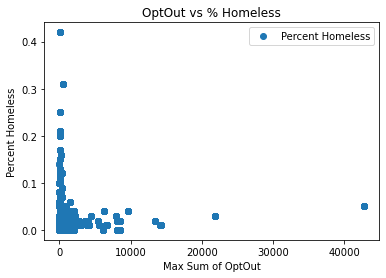

In [86]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Max Sum of OptOut', y='Percent Homeless',style='o') 
plt.title('OptOut vs % Homeless')  
plt.xlabel('Max Sum of OptOut')  
plt.ylabel('Percent Homeless')
plt.show()

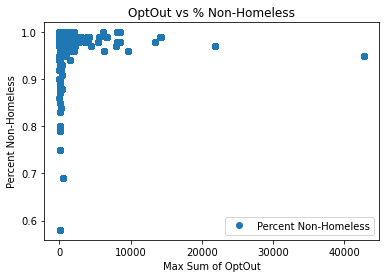

In [87]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Max Sum of OptOut', y='Percent Non-Homeless',style='o') 
plt.title('OptOut vs % Non-Homeless')  
plt.xlabel('Max Sum of OptOut')  
plt.ylabel('Percent Non-Homeless')  
plt.show()

Move forward with 'OptOut vs. % Homeless relationship

In [111]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Max Sum of OptOut'].values.reshape(-1,1)
y = df['Percent Homeless'].values.reshape(-1,1)

In [112]:
X

array([[42],
       [42],
       [42],
       ...,
       [12],
       [12],
       [12]], dtype=int64)

In [113]:
y

array([[0.01],
       [0.01],
       [0.01],
       ...,
       [0.02],
       [0.02],
       [0.02]])

In [114]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04. Regression analysis

In [115]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [116]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [117]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

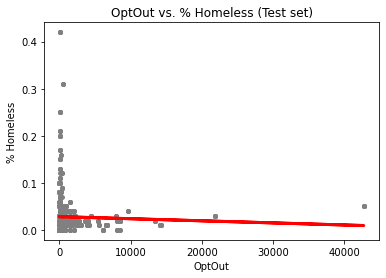

In [118]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('OptOut vs. % Homeless (Test set)')
plot_test.xlabel('OptOut')
plot_test.ylabel('% Homeless')
plot_test.show()

In [119]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [120]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.42645865e-07]]
Mean squared error:  0.0018464470345550623
R2 score:  0.0002973108039603378


In [121]:
y_predicted

array([[0.0281937 ],
       [0.02809897],
       [0.02821406],
       ...,
       [0.02821627],
       [0.02803789],
       [0.028037  ]])

In [122]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.10,0.028194
1,0.03,0.028099
2,0.03,0.028214
3,0.01,0.021993
4,0.02,0.025814
5,0.02,0.028003
6,0.02,0.027035
7,0.04,0.027333
8,0.00,0.028215
9,0.01,0.027961


In [123]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [124]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [125]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.42645865e-07]]
Mean squared error:  0.0020501439629097215
R2 score:  0.0010860365848106568


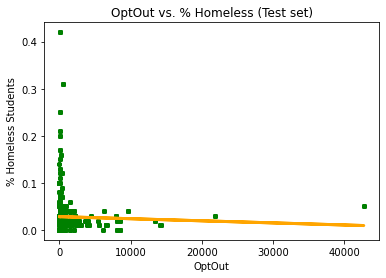

In [126]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='orange', linewidth =3)
plot_test.title('OptOut vs. % Homeless (Test set)')
plot_test.xlabel('OptOut')
plot_test.ylabel('% Homeless Students')
plot_test.show()

This did not perform very well, likely due to outliers. I hesitate to remove the outliers because there may be other important factors contributing to their data.
